# Zha et al. 2021 Models

Data from Zha et al. 2021, hadron-quark phase transition simulations of a variety of progenitors from Sukhbold et al. 2018 and the STOS EOS with B=145MeV.
  
Reference: Zha et al. ApJ 911 74 2021
- doi:10.3847/1538-4357/abec4c
- arXiv:2103.02268

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import Zha_2021
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

In [34]:
def plot_luminosity(model):
    fig, ax = plt.subplots(1, figsize=(8,6))
    for flavor in Flavor:

        ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color = 'C0' if flavor.is_electron else 'C1',
                ls = '-' if flavor.is_neutrino else ':',
                lw = 2 )

    ax.set(xlim=(0.65, 0.85),ylim=(0,100),
           xlabel=r'$t$ [s]',
           ylabel=r'luminosity [foe s$^{-1}$]',
           title=r'{}: {} $M_\odot$'.format(model.EOS, model.progenitor_mass.value))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

    fig.tight_layout()
    return fig

## s17 $M_\odot$

In [27]:
ifile = '../../models/Zha_2021/s17.dat'
model = Zha_2021(ifile)

In [28]:
model

**Zha_2021 Model**: Zha2021_s17

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $17$ $\mathrm{M_{\odot}}$|
|EOS | STOS_B145|

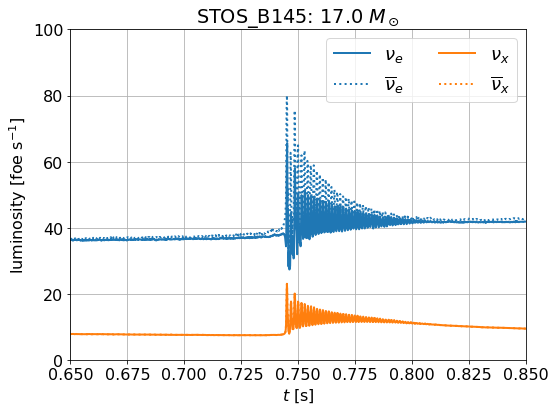

In [35]:
fig = plot_luminosity(model)

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [36]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 400*u.ms

ispec = model.get_initialspectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

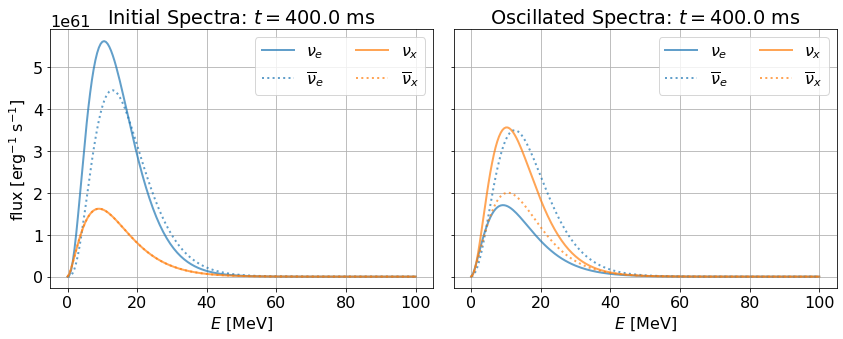

In [37]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();